In [53]:
import tensorflow.keras as keras
import matplotlib
import numpy as np

In [54]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils

import matplotlib.pyplot as plt

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
x_train.max()

255

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

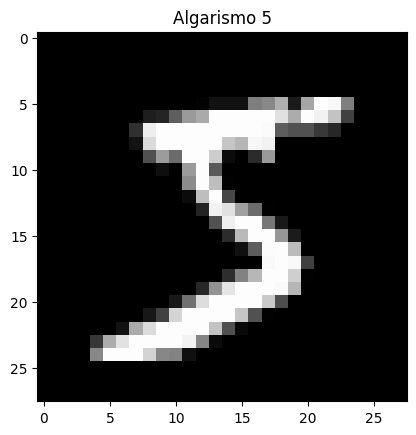

In [29]:
plt.imshow(x_train[0], cmap='gray')
plt.title('Algarismo ' + str(y_train[0]));

In [56]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [57]:
x_train = x_train.astype('float32')

In [58]:
x_test = (x_test.reshape(x_test.shape[0], 28, 28, 1)).astype('float32')

In [33]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [59]:
x_train /= 255
x_test /= 255

In [35]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [60]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## **Rede Neural**

In [61]:
network = Sequential()
network.add(InputLayer(shape=x_train.shape[1:]))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(units=128, activation='relu'))
network.add(Dense(units=10, activation='softmax'))

In [32]:
network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
network.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


2024-09-20 14:15:46.727795: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.8819 - loss: 0.4222 - val_accuracy: 0.9765 - val_loss: 0.0760
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9798 - loss: 0.0692 - val_accuracy: 0.9806 - val_loss: 0.0598
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9809 - val_loss: 0.0562
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9899 - loss: 0.0336 - val_accuracy: 0.9844 - val_loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9930 - loss: 0.0239 - val_accuracy: 0.9855 - val_loss: 0.0432


In [37]:
results = network.evaluate(x_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9830 - loss: 0.0465


[0.03887568786740303, 0.9864000082015991]

### **Melhorias**

In [15]:
network = Sequential()

network.add(InputLayer(shape=x_train.shape[1:]))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=128, activation='relu'))
network.add(Dropout(0.2))

network.add(Dense(units=128, activation='relu'))
network.add(Dropout(0.2))

network.add(Dense(units=10, activation='softmax'))

In [16]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
network.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

2024-09-13 15:37:03.437397: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8554 - loss: 0.4597

2024-09-13 15:39:02.932452: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 207ms/step - accuracy: 0.8555 - loss: 0.4591 - val_accuracy: 0.9672 - val_loss: 0.1154
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 118ms/step - accuracy: 0.9808 - loss: 0.0670 - val_accuracy: 0.9889 - val_loss: 0.0338
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9876 - val_loss: 0.0406
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.9893 - loss: 0.0351 - val_accuracy: 0.9903 - val_loss: 0.0324
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9876 - val_loss: 0.0452


In [19]:
network.evaluate(x_test, y_test)

2024-09-13 15:46:42.046370: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9833 - loss: 0.0597


[0.04523274302482605, 0.9876000285148621]

## **Cross Validation**

In [1]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from sklearn.model_selection import StratifiedKFold

2024-09-16 12:56:16.171833: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 12:56:16.364710: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 12:56:17.129816: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 12:56:19.750070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x, y), (x_test, y_test) = mnist.load_data()
x = x.reshape(x.shape[0], 28, 28, 1)
x = x.astype('float32')
x /= 255
y = np_utils.to_categorical(y, 10)

In [4]:
seed = 5
np.random.seed(seed)

In [5]:
kfold = StratifiedKFold(n_splits= 5, shuffle=True, random_state=seed)

In [8]:
results = []
for index_train, index_test in kfold.split(x, np.zeros(shape = (y.shape[0], 1))):
    network = Sequential()
    network.add(InputLayer(shape=x[index_train].shape[1:]))
    network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    network.add(MaxPooling2D(pool_size=(2,2)))
    network.add(Flatten())
    network.add(Dense(units=128, activation='relu'))
    network.add(Dense(units=10, activation='softmax'))

    network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    network.fit(x[index_train], y[index_train], batch_size=128, epochs=5)
    precision = network.evaluate(x[index_test], y[index_test])
    results.append(precision[1])

Epoch 1/5


2024-09-16 13:31:50.999671: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8647 - loss: 0.4893
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9734 - loss: 0.0897
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9838 - loss: 0.0558
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.9890 - loss: 0.0404
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9918 - loss: 0.0283
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9794 - loss: 0.0651
Epoch 1/5


2024-09-16 13:34:28.889266: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.8630 - loss: 0.4921
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9755 - loss: 0.0842
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9862 - loss: 0.0481
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9904 - loss: 0.0342
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9927 - loss: 0.0250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9861 - loss: 0.0498
Epoch 1/5


2024-09-16 13:36:54.753269: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.8625 - loss: 0.4899
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9756 - loss: 0.0863
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.9838 - loss: 0.0553
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 127ms/step - accuracy: 0.9880 - loss: 0.0399
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 120ms/step - accuracy: 0.9914 - loss: 0.0309
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9835 - loss: 0.0554
Epoch 1/5


2024-09-16 13:40:49.714339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.8537 - loss: 0.5086
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.9746 - loss: 0.0896
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9838 - loss: 0.0555
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9891 - loss: 0.0378
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9915 - loss: 0.0290
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9812 - loss: 0.0587
Epoch 1/5


2024-09-16 13:44:54.801505: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.8585 - loss: 0.5008
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.9741 - loss: 0.0893
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.9850 - loss: 0.0512
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9888 - loss: 0.0377
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9924 - loss: 0.0283
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9838 - loss: 0.0526


In [9]:
results

[0.9794999957084656,
 0.984416663646698,
 0.98416668176651,
 0.9816666841506958,
 0.984333336353302]

In [10]:
np.array(results).mean()

0.9828166723251343

In [11]:
np.array(results).std()

0.0019496453049786297

# **Data Augumentation**

In [1]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

2024-09-17 08:28:28.885697: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 08:28:29.223042: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 08:28:31.326543: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 08:28:42.232230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
model = Sequential()
model.add(InputLayer(shape=(28, 28, 1,)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
train_generator = ImageDataGenerator(
    rotation_range=7,
    horizontal_flip=True,
    shear_range=0.2,
    height_shift_range=0.07,
    zoom_range=0.2,
)

In [5]:
test_generator = ImageDataGenerator()

In [7]:
base_train = train_generator.flow(x_train, y_train, batch_size=128)

In [8]:
base_test = test_generator.flow(x_test, y_test, batch_size=128)

In [12]:
model.fit(base_train, epochs=5, validation_data=base_test)

Epoch 1/5


/home/appmarketing/anaconda3/envs/dlp/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 192ms/step - accuracy: 0.7497 - loss: 0.7929 - val_accuracy: 0.9447 - val_loss: 0.1774
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 133ms/step - accuracy: 0.9297 - loss: 0.2310 - val_accuracy: 0.9647 - val_loss: 0.1113
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9490 - loss: 0.1684 - val_accuracy: 0.9721 - val_loss: 0.0866
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 151ms/step - accuracy: 0.9565 - loss: 0.1413 - val_accuracy: 0.9720 - val_loss: 0.0840
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 128ms/step - accuracy: 0.9596 - loss: 0.1277 - val_accuracy: 0.9720 - val_loss: 0.0843


### Classsificar uma imagem

In [64]:
import random
import numpy as np

In [65]:
x_test.shape

(10000, 28, 28, 1)

In [133]:
i = random.randint(0, x_test.shape[0] - 1)
i

222

In [131]:
new = x_test[i]
new = np.expand_dims(new, axis=0)

In [132]:
prev = network.predict(new)
prev = prev > 0.5
print(f'O dígito previsto foi {np.where(prev == True)[1][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
O dígito previsto foi 2
